# Neural Networks for Handwritten Digit Recognition
 We will use neural network to recognize the hand-written digits 0-9

## Packages 
import all the packages for the project 
   - numpy is a fundamental package for scientific computing with python
   - matplotlib is a popular library to plot graphs in python
   - tensorflow a popular platform for machine learning 

In [109]:
import numpy as np
from scipy.io import loadmat
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear , sigmoid
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
import seaborn as sns
from PIL import Image
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
np.set_printoptions(precision = 2)

## Softmax
Defining my softmax function from its defination

In [38]:
def my_softmax(z):
    """Softmax converts a vector of values to a probablity distribution
    Args:
      z(ndarray (N,)) : input data, N features
    Returns:
      a(ndarray (N,)) : softmax of z
    """
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a
    

Checking my softmax function using the tensorflow softmax function

In [39]:
z = np.array([1.,2.,3.,4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [6]:

(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 4s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


### Veiw the variable

(28, 28)
The prediction is  5


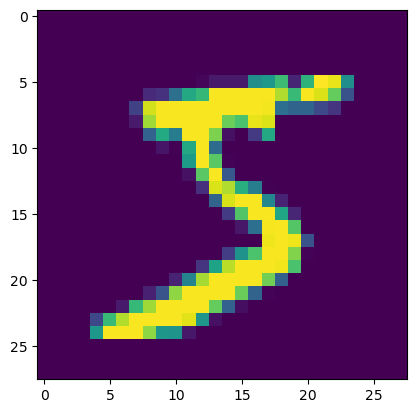

In [45]:
print(train_X[0].shape)
plt.imshow(train_X[0])
# Print the corresponding labels
print("The prediction is ", train_y[0])

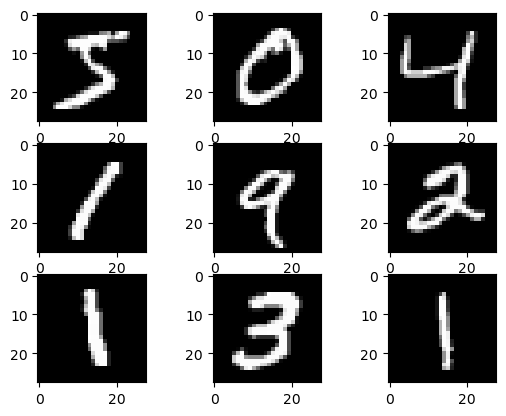

In [15]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Buliding neural network
 We will build the neural network using Sequential and Dense function of the tensorflow.
### Softmax placement 
Numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when building the model and using the model Building:
- The final Dense layer should use a 'linear activation'. This is effectively no activation
- The **model.compile** statement will indicates this is by including **from_logits = True**
- This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

In [91]:
tf.random.set_seed(123)
model = Sequential ([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(50, activation = "relu", name="L1"),
    tf.keras.layers.Dense(50, activation = "relu", name="L2"),
    tf.keras.layers.Dense(10, activation = "sigmoid", name="L3")
])


Summary of the tensorflow 

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 50)                39250     
                                                                 
 L2 (Dense)                  (None, 50)                2550      
                                                                 
 L3 (Dense)                  (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The following code
- A loss function, **SparseCategoricalCrossentropy** and indicates the softmax should be included with the loss calculation by adding **from_logits = True**
- Optimizer :- **Adaptive Moment** (Adam)

In [93]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)



Fitting the model into the dataset for the training purpose

In [94]:
model.fit(train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 503us/step - loss: 1.5304 - accuracy: 0.8107
Epoch 2/10
1875/1875 [==============================] - 1s 496us/step - loss: 0.3585 - accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 1s 499us/step - loss: 0.2982 - accuracy: 0.9242
Epoch 4/10
1875/1875 [==============================] - 1s 500us/step - loss: 0.2436 - accuracy: 0.9358
Epoch 5/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.2131 - accuracy: 0.9418
Epoch 6/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.1886 - accuracy: 0.9491
Epoch 7/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.1662 - accuracy: 0.9529
Epoch 8/10
1875/1875 [==============================] - 1s 493us/step - loss: 0.1511 - accuracy: 0.9570
Epoch 9/10
1875/1875 [==============================] - 1s 500us/step - loss: 0.1410 - accuracy: 0.9600
Epoch 10/10
1875/1875 [==============================] - 1s 499u

Prediction of the accuracy of the model on the test datasets

In [95]:
loss,accuracy = model.evaluate(test_X,test_y)
print(accuracy)

313/313 [==============================] - 0s 353us/step - loss: 0.1828 - accuracy: 0.9550
0.9549999833106995


In [96]:
print(train_X.shape)

(60000, 28, 28)


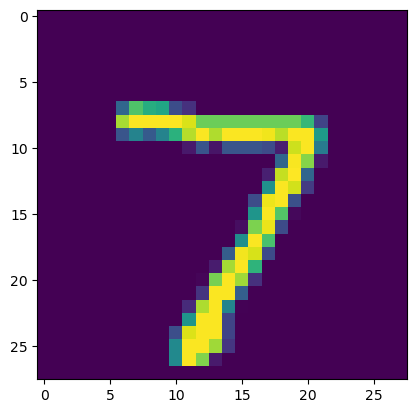

In [97]:
plt.imshow(test_X[0])
plt.show()

In [98]:
print(test_y[0])

7


## Prediction
- Making prediction using the test datatsets and using the **np.argmax(i)** this will pick the highest probablity and display that number according to the model.
- **model.predict** gives prediction probability of the each class for the data points

In [99]:
y_pred = model.predict(test_X)
print(y_pred.shape)

313/313 [==============================] - 0s 300us/step
(10000, 10)


In [100]:
print(y_pred[0])

[1.61e-10 8.98e-06 6.41e-05 3.99e-04 2.30e-07 9.39e-09 1.95e-13 6.74e-01
 1.84e-08 2.50e-06]


In [101]:
label_of_first_image = np.argmax(y_pred[0])
print(label_of_first_image)

7


## Converting the Prediction Probabilty to class label

In [104]:
Y_pred_Labels = [np.argmax(i) for i in y_pred]
Y_pred_Labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 1,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 3,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 3,
 5,
 5,
 1,
 5,
 6,
 0,
 2,
 4,
 4,
 6,
 1,
 4,
 6,
 3,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 4,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 9,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 3,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 3,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 3,
 3,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


## Y_test -> True Labels
## Y_pred_labels -> Predicted Labels

In [105]:
print(y_pred)

[[1.61e-10 8.98e-06 6.41e-05 ... 6.74e-01 1.84e-08 2.50e-06]
 [8.25e-02 1.00e+00 1.00e+00 ... 5.60e-01 3.22e-01 2.20e-09]
 [4.40e-02 1.00e+00 9.68e-01 ... 8.77e-01 8.29e-01 8.98e-09]
 ...
 [1.14e-02 9.38e-05 4.58e-03 ... 2.36e-02 1.18e-02 2.76e-02]
 [8.09e-03 7.02e-14 1.00e+00 ... 2.17e-03 1.00e+00 6.17e-03]
 [1.00e+00 6.63e-02 1.00e+00 ... 6.85e-01 6.54e-01 9.85e-02]]


### Confusion Matrix
This is used for the accuracy of the test datasets

In [108]:
conf_mat = confusion_matrix(test_y,Y_pred_Labels)
print(conf_mat)

tf.Tensor(
[[ 951    0    6    1   10    4    1    3    1    3]
 [   0 1121    7    2    0    1    0    2    2    0]
 [   4   67  933    7    7    1    2    5    5    1]
 [  32   89  107  756    2    5    0    7    5    7]
 [   1    0    5    1  948    0    1    0    4   22]
 [  13  120   55  263    0  426    5    2    6    2]
 [   9    6   14    0   60   14  850    0    5    0]
 [   1    3   17    4    1    2    0  988    1   11]
 [   6    1   11   11    3   10    6    7  914    5]
 [   3    9    1   18   43    9    0   10    6  910]], shape=(10, 10), dtype=int32)


Seaborn is used for the heat maps and to show the accuracy of the test datasets

Text(0.5, 47.7222222222222, 'Predicted Labels')

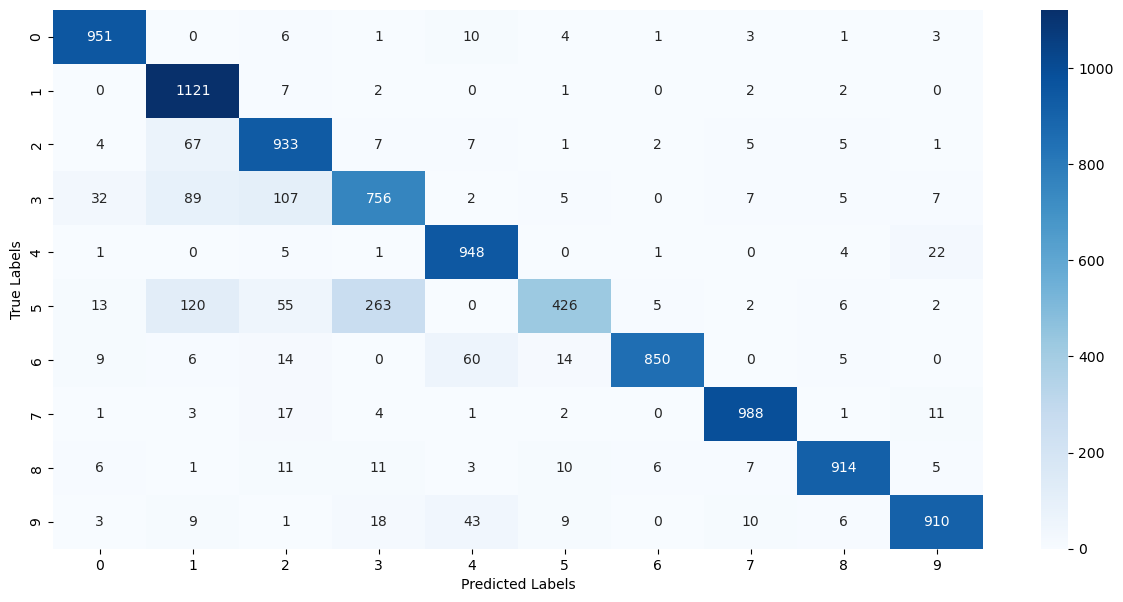

In [110]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')